In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import cv2
import os
import numpy as np
import random
from scipy.ndimage import rotate

In [7]:
data_path = '/content/drive/MyDrive/cat_dog_medium'

In [8]:
categories = os.listdir(data_path)

In [9]:
categories

['cats', 'dogs']

In [10]:
labels = [i for i in range(len(categories))]
labels

[0, 1]

In [11]:
label_dict = dict(zip(categories,labels))
label_dict

{'cats': 0, 'dogs': 1}

In [12]:
image_size = 100
data = []
target = []
for category in categories:
  folder_path = os.path.join(data_path,category)
  print(folder_path)
  image_names = os.listdir(folder_path)
  print(image_names)

  for image_name in image_names:
    img_path = os.path.join(folder_path,image_name)
    # print(img_path)
    img = cv2.imread(img_path) #convert image into pixel matrices
    # print(img)

    try:
      gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      resized = cv2.resize(gray,(image_size,image_size))
      data.append(resized)
      target.append(label_dict[category])

    except Exception as e:
        print("exception",e)

/content/drive/MyDrive/cat_dog_medium/cats
['cats_00004.jpg', 'cats_00001.jpg', 'cats_00002.jpg', 'cats_00003.jpg', 'cats_00006.jpg', 'cats_00005.jpg', 'cats_00009.jpg', 'cats_00010.jpg', 'cats_00008.jpg', 'cats_00007.jpg', 'cats_00015.jpg', 'cats_00014.jpg', 'cats_00011.jpg', 'cats_00013.jpg', 'cats_00012.jpg', 'cats_00018.jpg', 'cats_00024.jpg', 'cats_00026.jpg', 'cats_00020.jpg', 'cats_00019.jpg', 'cats_00025.jpg', 'cats_00021.jpg', 'cats_00017.jpg', 'cats_00027.jpg', 'cats_00016.jpg', 'cats_00023.jpg', 'cats_00022.jpg', 'cats_00035.jpg', 'cats_00031.jpg', 'cats_00033.jpg', 'cats_00030.jpg', 'cats_00036.jpg', 'cats_00032.jpg', 'cats_00039.jpg', 'cats_00037.jpg', 'cats_00028.jpg', 'cats_00038.jpg', 'cats_00029.jpg', 'cats_00034.jpg', 'cats_00046.jpg', 'cats_00045.jpg', 'cats_00044.jpg', 'cats_00049.jpg', 'cats_00048.jpg', 'cats_00043.jpg', 'cats_00042.jpg', 'cats_00047.jpg', 'cats_00041.jpg', 'cats_00040.jpg', 'cats_00051.jpg', 'cats_00052.jpg', 'cats_00050.jpg', 'cats_00053.jpg', 'c

array([[36, 42, 42, ...,  6,  6,  6],
       [20, 21, 22, ...,  6,  6,  5],
       [15, 17, 17, ...,  6,  5,  4],
       ...,
       [41, 42, 40, ..., 32, 32, 35],
       [37, 37, 40, ..., 34, 33, 32],
       [38, 37, 38, ..., 33, 33, 30]], dtype=uint8)
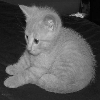

In [13]:
data[0]

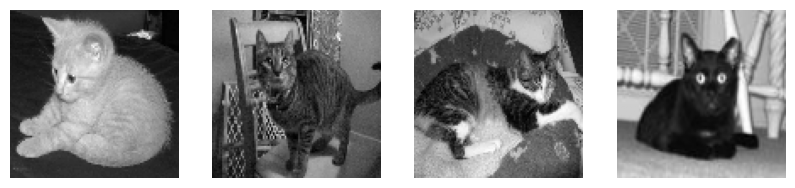

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range (4):
  plt.subplot(1,4,i+1)
  plt.imshow(data[i],cmap='gray')
  plt.axis('off')
plt.show()

In [15]:
import numpy as np
data=np.array(data)/255.0
data

array([[[0.14117647, 0.16470588, 0.16470588, ..., 0.02352941,
         0.02352941, 0.02352941],
        [0.07843137, 0.08235294, 0.08627451, ..., 0.02352941,
         0.02352941, 0.01960784],
        [0.05882353, 0.06666667, 0.06666667, ..., 0.02352941,
         0.01960784, 0.01568627],
        ...,
        [0.16078431, 0.16470588, 0.15686275, ..., 0.1254902 ,
         0.1254902 , 0.1372549 ],
        [0.14509804, 0.14509804, 0.15686275, ..., 0.13333333,
         0.12941176, 0.1254902 ],
        [0.14901961, 0.14509804, 0.14901961, ..., 0.12941176,
         0.12941176, 0.11764706]],

       [[0.47843137, 0.49411765, 0.49803922, ..., 0.45490196,
         0.42352941, 0.41176471],
        [0.49019608, 0.49803922, 0.50588235, ..., 0.42745098,
         0.43137255, 0.41568627],
        [0.4745098 , 0.48627451, 0.51372549, ..., 0.45490196,
         0.42352941, 0.42745098],
        ...,
        [0.0745098 , 0.09803922, 0.09411765, ..., 0.15686275,
         0.11764706, 0.17254902],
        [0.0

In [16]:
data[0].shape

(100, 100)

In [17]:
data.shape

(2000, 100, 100)

In [18]:
data=np.reshape(data,(data.shape[0],image_size,image_size,1))
target=np.array(target)

In [19]:
from tensorflow.keras.utils import to_categorical
new_target = to_categorical(target)

In [20]:
new_target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_target,test_size=0.2)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1600, 100, 100, 1), (400, 100, 100, 1), (1600, 2), (400, 2))

In [23]:
data.shape[1:]

(100, 100, 1)

In [24]:
from matplotlib.cbook import flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D


model = Sequential()

model.add(Conv2D(50,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(80,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))



model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation ='relu'))
model.add(Dense(2,activation = 'softmax'))





/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [26]:
history= model.fit(x_train,y_train,
                   validation_data=(x_test,y_test),
                   epochs=10,batch_size=16,
                   shuffle=True)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5362 - loss: 0.7636 - val_accuracy: 0.5500 - val_loss: 0.6911
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6144 - loss: 0.6732 - val_accuracy: 0.5650 - val_loss: 0.6856
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6169 - loss: 0.6471 - val_accuracy: 0.6075 - val_loss: 0.6732
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6359 - loss: 0.6408 - val_accuracy: 0.6225 - val_loss: 0.6661
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6866 - loss: 0.5779 - val_accuracy: 0.6200 - val_loss: 0.6533
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7429 - loss: 0.5182 - val_accuracy: 0.6500 - val_loss: 0.6518
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7643 - loss: 0.4679 - val_accuracy: 0.6400 - val_loss: 0.6793
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8240 - loss: 0.3840 - val_accuracy

In [27]:
y_predict = model.predict(x_test)
y_pred = np.argmax(y_predict, axis=1)     # predicted class ints
y_true = np.argmax(y_test, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [28]:
y_predict.shape

(400, 2)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import matplotlib.pyplot as plt

print(confusion_matrix(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))

[[127  78]
 [ 63 132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.64       205
           1       0.63      0.68      0.65       195

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.65      0.65      0.65       400



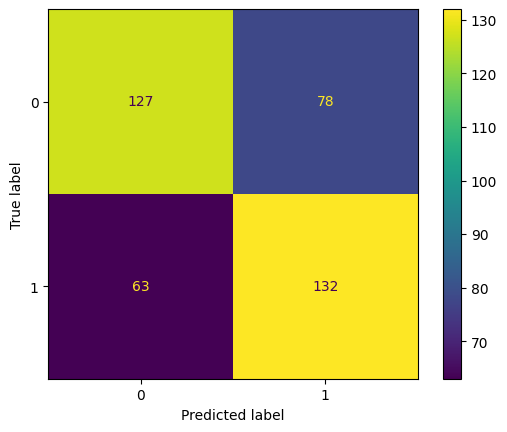

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_true,y_pred))

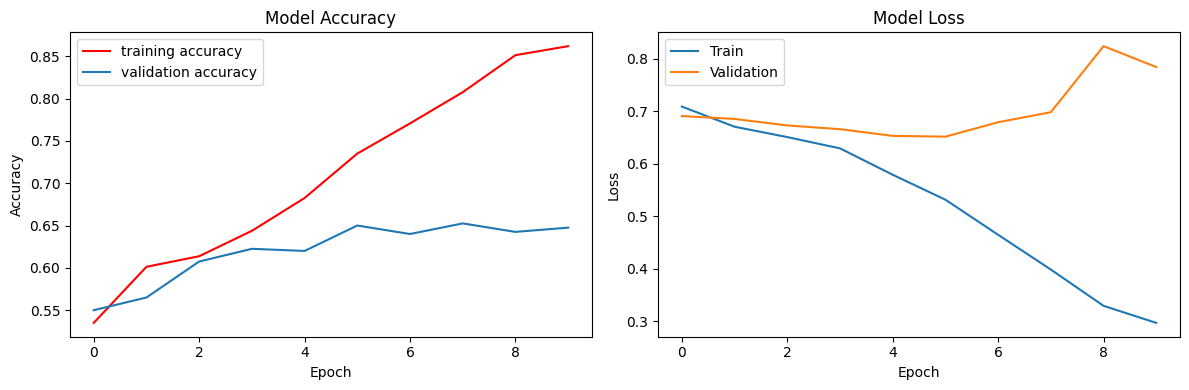

In [31]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],'r',label = 'training accuracy')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.show()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.tight_layout()
plt.show()

